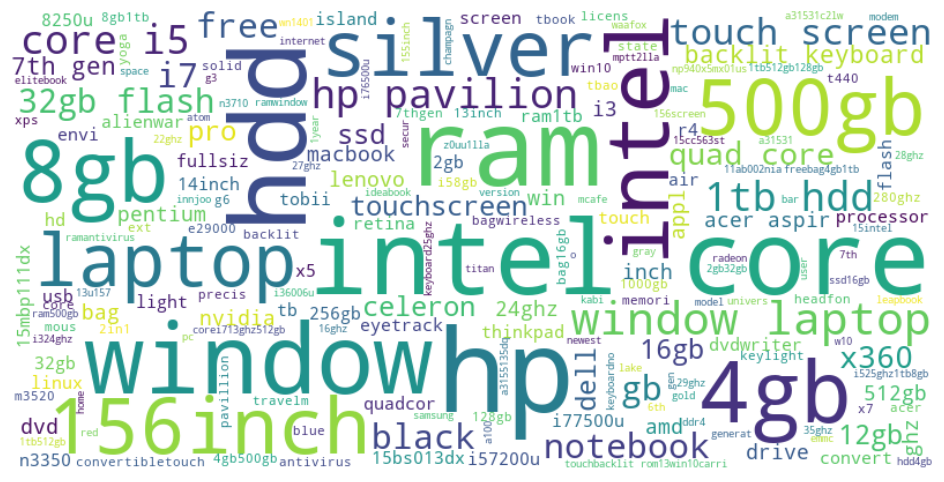

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load CSV file into pandas DataFrame
df = pd.read_csv('items.csv')

# Define regex pattern to match URLs and remove them from relevant columns
url_pattern = re.compile(r'https?://\S+|www\.\S+')
df['image_urls'] = df['image_urls'].apply(lambda x: url_pattern.sub('', x))
df['product_url'] = df['product_url'].apply(lambda x: url_pattern.sub('', x))

# Remove non-alphanumeric characters from CSV file
df.replace(r'[^a-zA-Z0-9 ]', '', regex=True, inplace=True)

# Tokenize relevant columns
df['Title_tokens'] = df['title'].apply(word_tokenize)
df['Rating_tokens'] = df['rating'].apply(word_tokenize)
df['Brand_tokens'] = df['brand'].apply(word_tokenize)

# Remove stopwords from relevant columns
stop_words = set(stopwords.words('english'))
df['Rating_tokens'] = df['Rating_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Stem and lemmatize relevant columns
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
df['Title_tokens'] = df['Title_tokens'].apply(lambda x: [lemmatizer.lemmatize(stemmer.stem(word)) for word in x])
df['Rating_tokens'] = df['Rating_tokens'].apply(lambda x: [lemmatizer.lemmatize(stemmer.stem(word)) for word in x])
df['Brand_tokens'] = df['Brand_tokens'].apply(lambda x: [lemmatizer.lemmatize(stemmer.stem(word)) for word in x])

# Generate word cloud
text = " ".join(review for review_list in df.Title_tokens for review in review_list)
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save cleaned data to a new CSV file
df.to_csv('cleaned_items.csv', index=False)
